INFO:sbi_delta.spectra_manager:Initialized SpectraManager(folder=/groups/spruston/home/moharb/sbi-DELTA/data/spectra_npz, dyes=['JF479', 'JF525', 'JF552', 'JF608', 'JFX673'], bg_dye=AF_v1)
INFO:sbi_delta.spectra_manager:Starting load() of spectra
INFO:sbi_delta.spectra_manager:Found 22 .npz files in '/groups/spruston/home/moharb/sbi-DELTA/data/spectra_npz'
INFO:sbi_delta.spectra_manager:Loading emission spectrum for dye 'JF479' from /groups/spruston/home/moharb/sbi-DELTA/data/spectra_npz/JF479.npz
INFO:sbi_delta.spectra_manager:Completed processing for 'JF479'
INFO:sbi_delta.spectra_manager:Loading emission spectrum for dye 'JF525' from /groups/spruston/home/moharb/sbi-DELTA/data/spectra_npz/JF525.npz
INFO:sbi_delta.spectra_manager:Completed processing for 'JF525'
INFO:sbi_delta.spectra_manager:Loading emission spectrum for dye 'JF552' from /groups/spruston/home/moharb/sbi-DELTA/data/spectra_npz/JF552.npz
INFO:sbi_delta.spectra_manager:Completed processing for 'JF552'
INFO:sbi_delta.sp

JF479 @ 450.0 nm → self: 0.495, crosstalk: 1.061, net: 0.567
JF525 @ 526.0 nm → self: 1.000, crosstalk: 0.967, net: -0.033
JF552 @ 552.0 nm → self: 0.999, crosstalk: 0.629, net: -0.370
JF608 @ 608.0 nm → self: 0.999, crosstalk: 0.168, net: -0.832
JFX673 @ 673.0 nm → self: 1.000, crosstalk: 0.000, net: -1.000
AF_v1 @ 450.0 nm → self: 1.000, crosstalk: 0.556, net: -0.444
JF479 @ 451.0 nm → self: 0.513, crosstalk: 1.065, net: 0.552
JF525 @ 526.0 nm → self: 1.000, crosstalk: 0.967, net: -0.033
JF552 @ 552.0 nm → self: 0.999, crosstalk: 0.629, net: -0.370
JF608 @ 608.0 nm → self: 0.999, crosstalk: 0.168, net: -0.832
JFX673 @ 673.0 nm → self: 1.000, crosstalk: 0.000, net: -1.000
AF_v1 @ 450.0 nm → self: 1.000, crosstalk: 0.556, net: -0.444
JF479 @ 452.0 nm → self: 0.531, crosstalk: 1.069, net: 0.537
JF525 @ 526.0 nm → self: 1.000, crosstalk: 0.967, net: -0.033
JF552 @ 552.0 nm → self: 0.999, crosstalk: 0.629, net: -0.370
JF608 @ 608.0 nm → self: 0.999, crosstalk: 0.168, net: -0.832
JFX673 @ 

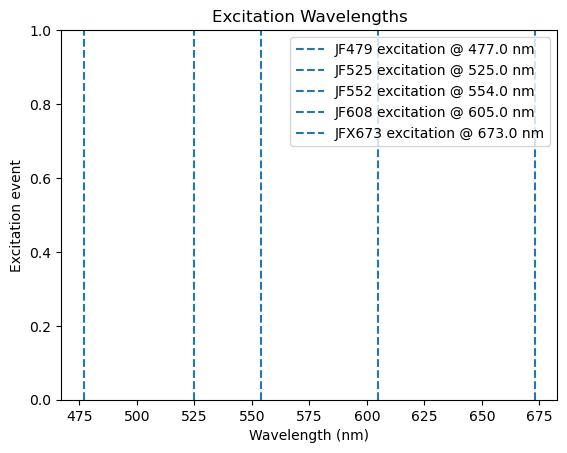

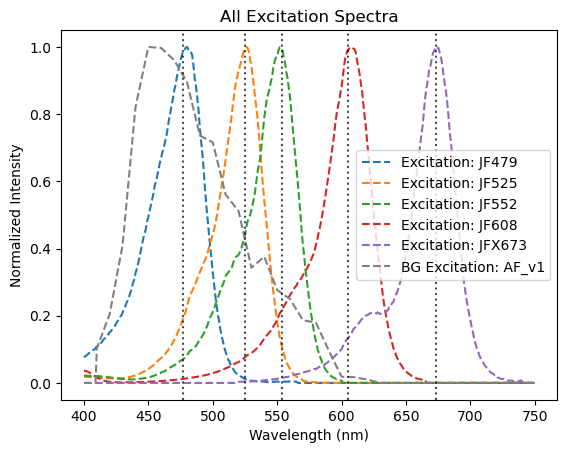

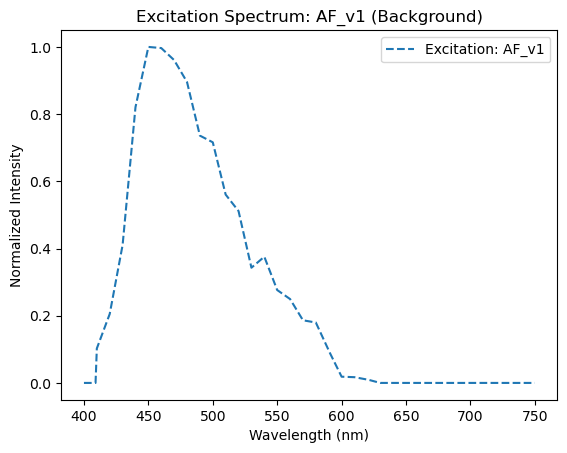

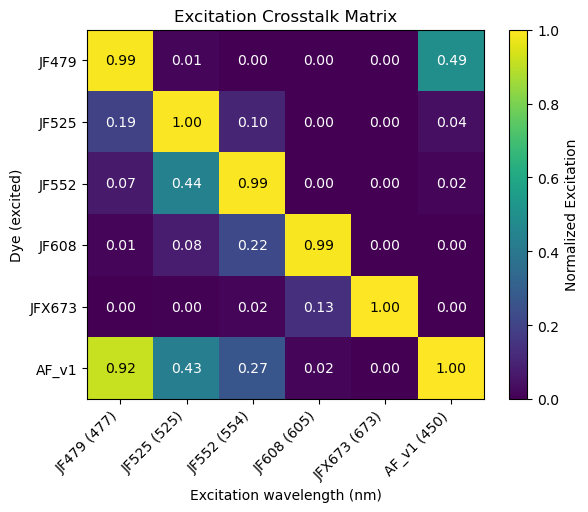

In [2]:
# Cell 1: Setup
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
base_path = os.path.abspath("../..")
sys.path.append(base_path)  # Adjust path as needed
from sbi_delta.config import BaseConfig, ExcitationConfig
from sbi_delta.spectra_manager import SpectraManager
from sbi_delta.excitation_manager import ExcitationManager

# Cell 2: Load spectra and configure
spectra_folder = os.path.join(base_path, "data/spectra_npz")  # adjust path as needed
dye_names = ["JF479", "JF525", "JF552", "JF608", "JFX673"]
cfg = BaseConfig(
    min_wavelength=400,
    max_wavelength=750,
    wavelength_step=1,
    spectra_folder=spectra_folder,
    dye_names=dye_names,
    bg_dye="AF_v1"
)
exc_cfg = ExcitationConfig(
    excitation_mode="min_crosstalk"
)
mgr = SpectraManager(cfg)
mgr.load()
emgr = ExcitationManager(cfg, exc_cfg, mgr)

# Cell 3: Show results
print(emgr)
emgr.print_assignment_table()

# Cell 4: Plot excitation wavelengths
ax = emgr.plot_excitation_wavelengths()
plt.show()

# Cell 5: Plot excitation wavelengths on spectra
ax = emgr.plot_on_spectra(mgr)
plt.show()

# Cell 6: Plot crosstalk matrix
ax = emgr.plot_crosstalk_matrix()
plt.show()